In [1]:
%tensorflow_version 2.x

Colab only includes TensorFlow 2.x; %tensorflow_version has no effect.


##Задание 2

Реализовать и обучить (с нуля) СНС для задачи классификации изображений на датасете CIFAR-10
Библиотеки: [Python, Tensorflow]



In [2]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np

import tensorflow as tf

In [3]:
(train_x, train_y), (test_x, test_y) = tf.keras.datasets.cifar10.load_data()

train_x = train_x.reshape(-1, 32, 32, 3).astype(np.float32) / 255.
test_x = test_x.reshape(-1, 32, 32, 3).astype(np.float32) / 255.

print(train_x.shape, train_x.dtype)
print(test_x.shape, test_x.dtype)
print(train_y.shape, train_y.dtype)
print(test_y.shape, test_y.dtype)

170508288/170498071 [==============================] - 14s 0us/step
(50000, 32, 32, 3) float32
(10000, 32, 32, 3) float32
(50000, 1) uint8
(10000, 1) uint8


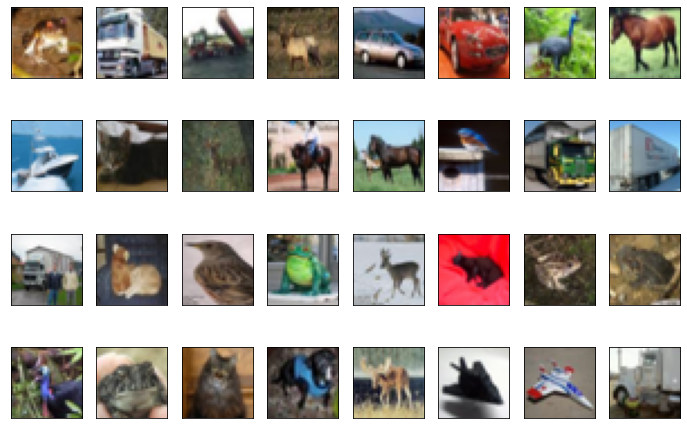

In [4]:
some_samples = train_x[:32, ...]

fig = plt.figure(figsize=(12, 8))
for j in range(some_samples.shape[0]):
    ax = fig.add_subplot(4, 8, j+1)
    ax.imshow(some_samples[j,:,:,:])
    plt.xticks([]), plt.yticks([])
plt.show()

In [9]:
model = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(32, (5, 5), padding='same', activation='relu'),
    tf.keras.layers.MaxPool2D((2, 2), (2, 2)),
    tf.keras.layers.Conv2D(64, (5, 5), padding='same', activation='relu'),
    tf.keras.layers.MaxPool2D((2, 2), (2, 2)),
    tf.keras.layers.Conv2D(128, (5, 5), padding='same', activation='relu'),
    tf.keras.layers.MaxPool2D((2, 2), (2, 2)),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(256, activation='relu'),
    tf.keras.layers.Dense(512, activation='relu'),
    tf.keras.layers.Dense(10, activation='softmax')
])

In [11]:
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [13]:
NUM_EPOCHS = 15

model.fit(train_x, train_y, epochs=NUM_EPOCHS)

Epoch 1/15
1563/1563 [==============================] - 7s 4ms/step - loss: 1.1816 - accuracy: 0.5770
Epoch 2/15
1563/1563 [==============================] - 7s 4ms/step - loss: 0.9489 - accuracy: 0.6674
Epoch 3/15
1563/1563 [==============================] - 7s 5ms/step - loss: 0.7941 - accuracy: 0.7208
Epoch 4/15
1563/1563 [==============================] - 7s 5ms/step - loss: 0.6770 - accuracy: 0.7605
Epoch 5/15
1563/1563 [==============================] - 7s 5ms/step - loss: 0.5755 - accuracy: 0.7964
Epoch 6/15
1563/1563 [==============================] - 7s 5ms/step - loss: 0.4929 - accuracy: 0.8258
Epoch 7/15
1563/1563 [==============================] - 7s 4ms/step - loss: 0.4134 - accuracy: 0.8545
Epoch 8/15
1563/1563 [==============================] - 7s 4ms/step - loss: 0.3483 - accuracy: 0.8767
Epoch 9/15
1563/1563 [==============================] - 7s 4ms/step - loss: 0.3053 - accuracy: 0.8921
Epoch 10/15
1563/1563 [==============================] - 7s 4ms/step - loss: 0.259

In [8]:
model.evaluate(test_x, test_y)

313/313 [==============================] - 1s 3ms/step - loss: 1.1634 - accuracy: 0.5890


[1.163394570350647, 0.5889999866485596]